Importowanie bibliotek

In [366]:
import numpy as np
import cv2
from scipy import fftpack
from pylab import *

Wczytanie i wyświetlenie pliku

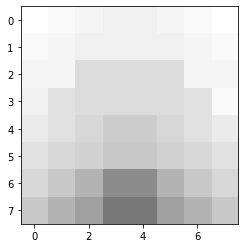

In [367]:
file = open("input_img_1.txt", 'r')
size = file.readline().split(' ')
size_x = np.uint8(size[0])
size_y = np.uint8(size[1])

img = np.zeros((size_x, size_y))
for x in range(size_x):
    line = file.readline().split(' ')
    for y in range(size_y):
        img[x][y] = int(line[y])

file.close()

# print(img)

figure(1)
img = np.array(img, dtype=np.uint8)
imshow(img, cmap='gray', vmin='0', vmax='255')

Wczytanie tabeli kwantyzacji

In [368]:
file = open("quantization_table_N.txt", 'r')
q_table_N = zeros((8, 8))
for i in range(8):
    line = file.readline().split(' ')
    for j in range(8):
        q_table_N[i][j] = int(line[j])
    
file.close()
q_table_N = np.array(q_table_N, dtype=np.uint8)
print(q_table_N)

[[ 16  11  10  16  24  40  51  61]
 [ 12  12  14  19  26  58  60  55]
 [ 14  13  16  24  40  57  69  56]
 [ 14  17  22  29  51  87  80  62]
 [ 18  22  37  56  68 109 103  77]
 [ 24  35  55  64  81 104 113  92]
 [ 49  64  78  87 103 121 120 101]
 [ 72  92  95  98 112 100 103  99]]


Wprowadzenie czynnika jakości

In [369]:
q_factor = 60
if q_factor < 50:
    S = np.floor(5000 / q_factor)
else:
    S = np.floor(200 - 2 * q_factor)

q_table = zeros((8, 8))

for i in range(8):
    for j in range(8):
        q_table[i][j] = np.floor((S * q_table_N[i][j] + 50) / 100)

print(q_table)

[[13.  9.  8. 13. 19. 32. 41. 49.]
 [10. 10. 11. 15. 21. 46. 48. 44.]
 [11. 10. 13. 19. 32. 46. 55. 45.]
 [11. 14. 18. 23. 41. 70. 64. 50.]
 [14. 18. 30. 45. 54. 87. 82. 62.]
 [19. 28. 44. 51. 65. 83. 90. 74.]
 [39. 51. 62. 70. 82. 97. 96. 81.]
 [58. 74. 76. 78. 90. 80. 82. 79.]]


Wykonanie transformacji cosinusowej

In [370]:
img_DCT = fftpack.dctn(img, norm='ortho')
img_DCT = np.array(img_DCT, dtype=np.float16)
print(img_DCT)

[[ 1.7320e+03 -1.7334e+00  1.0594e+02 -1.4697e+00 -5.0000e+00 -9.8193e-01
   7.5312e+00 -3.4497e-01]
 [ 2.0275e+02 -4.7827e-01 -5.8125e+01 -4.0552e-01  1.7141e+01 -2.7100e-01
  -1.4852e+01 -9.5154e-02]
 [-5.5188e+01  2.2656e+00  2.4656e+01  1.9209e+00 -1.5773e+01  1.2832e+00
   6.2500e+00  4.5068e-01]
 [ 4.6812e+01  1.3623e+00 -2.2875e+01  1.1553e+00 -1.1835e-01  7.7148e-01
   4.8047e+00  2.7100e-01]
 [-1.2500e+01 -1.7334e+00  2.8711e+00 -1.4697e+00  5.0000e+00 -9.8193e-01
   6.9297e+00 -3.4497e-01]
 [-4.0664e+00 -2.0391e+00  1.2016e+01 -1.7285e+00 -5.9473e-01 -1.1553e+00
   1.6650e+00 -4.0552e-01]
 [ 3.9238e+00  9.3848e-01 -6.2500e+00  7.9541e-01  1.1211e+00  5.3174e-01
  -7.1602e+00  1.8665e-01]
 [-1.1266e+01  2.4043e+00  1.8250e+01  2.0391e+00 -1.1445e+01  1.3623e+00
  -7.0234e+00  4.7827e-01]]


Kwantyzacja

In [371]:
for i in range(len(img_DCT)):
    for j in range(len(img_DCT[0])):
        img_DCT[i][j] = np.int16(img_DCT[i][j] / q_table[i][j])

img_DCT = np.array(img_DCT, dtype=np.int16)
print(img_DCT)

[[133   0  13   0   0   0   0   0]
 [ 20   0  -5   0   0   0   0   0]
 [ -5   0   1   0   0   0   0   0]
 [  4   0  -1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


Odwrócenie kwantyzacji

In [372]:
for i in range(len(img_DCT)):
    for j in range(len(img_DCT[0])):
        img_DCT[i][j] = img_DCT[i][j] * q_table[i][j]

print(img_DCT)

[[1729    0  104    0    0    0    0    0]
 [ 200    0  -55    0    0    0    0    0]
 [ -55    0   13    0    0    0    0    0]
 [  44    0  -18    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]]


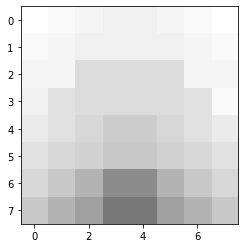

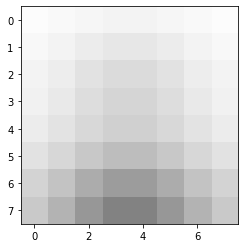

In [373]:
img_IDCT = fftpack.idctn(img_DCT, norm='ortho')
img_IDCT = np.array(img_IDCT, dtype=np.uint8)

figure(2)
imshow(img, cmap='gray', vmin='0', vmax='255')
figure(3)
imshow(img_IDCT, cmap='gray', vmin='0', vmax='255')
